##  Material for the course "Numerical Simulation of reactive flows"  
Author: Jun.-Prof. Federica Ferraro \
Technische Universität Braunschweig \
Institut für Flugantriebe und Strömungsmaschinen (IFAS)

Date: 16.11.2023

### Exercise 2 - Calculation of the chemical equilibrium
Documentation:\
https://cantera.org/dev/python/thermo.html

In [2]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt


**Decomposition of CO2** \
Find the mole fractions of the mixture that results from pure CO2 at various equilibrium temperatures
(T = 1500, 2000, 2500, 3000 K)
and pressure (p = 0.1, 1, 10, 100 atm).

In [3]:
#Create a Cantera input file that contains all the species relevant for the problem 

from pathlib import Path

yaml_input = """
phases:
- name: co2decomposition
  thermo: ideal-gas
  species:
  - gri30.yaml/species: [CO2, O2, CO]
"""

Path("co2_decomposition.yaml").write_text(yaml_input);

In [4]:
#Create a cantera gas mixture object 

gas = ct.Solution('co2_decomposition.yaml')

#Example for T = 2500 K and p = 1 atm
gas.TPX = 2500,ct.one_atm, "CO2:1"


In [5]:
# Calculate equilibrium at constant temperature and pressure
gas.equilibrate('TP')

In [5]:
print(gas.report())


  co2decomposition:

       temperature   2500 K
          pressure   1.0133e+05 Pa
           density   0.20146 kg/m^3
  mean mol. weight   41.327 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -5.3597e+06        -2.215e+08  J
   internal energy       -5.8626e+06       -2.4229e+08  J
           entropy            7699.4        3.1819e+05  J/K
    Gibbs function       -2.4608e+07        -1.017e+09  J
 heat capacity c_p            1380.3             57044  J/K
 heat capacity c_v            1179.1             48729  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               CO2           0.87022           0.81719           -52.101
                O2          0.047181          0.060937           -32.381
                CO          0.082602           0.12187      

In [6]:
# Check the different equilibrium obtained with the full GRI30 mechanism 

gas2 = ct.Solution('gri30.yaml')

#Example for T = 2500 K and p = 1 atm
gas2.TPX = 2500,ct.one_atm, "CO2:1"
gas2.equilibrate('TP')

print(gas2.report())


  gri30:

       temperature   2500 K
          pressure   1.0133e+05 Pa
           density   0.20098 kg/m^3
  mean mol. weight   41.23 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -5.3299e+06       -2.1975e+08  J
   internal energy       -5.8341e+06       -2.4054e+08  J
           entropy              7712        3.1797e+05  J/K
    Gibbs function        -2.461e+07       -1.0147e+09  J
 heat capacity c_p            1380.3             56908  J/K
 heat capacity c_v            1178.6             48594  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                 O         0.0013718         0.0035352           -16.202
                O2          0.046263          0.059611           -32.403
                 C        3.5217e-15        1.2089e-14           -19.701

**Plot the mole fraction of CO for all the (T,P) combination above.**
Steps:
1. create vector with T and p
2. implement a loop to calculate the equilibrium for all the combination (p,T) and save the mole fraction X_co in an array
3. plot the results with matplotlib

In [7]:
# Add python code here



In [8]:
T=[1500,2000,2500,3000]
p=[0.1*ct.one_atm,ct.one_atm,10*ct.one_atm, 100*ct.one_atm]

In [9]:
gas.X = "CO2:1"
i_co = gas.species_index('CO')


In [10]:
X_co =[]
for temp in T:
    for press in p:
        gas.TP = temp, press
        gas.equilibrate('TP')
        X_co.append(gas.X[i_co])
        
#print(temp, press ,X_co)
p = [val/ct.one_atm for val in p]

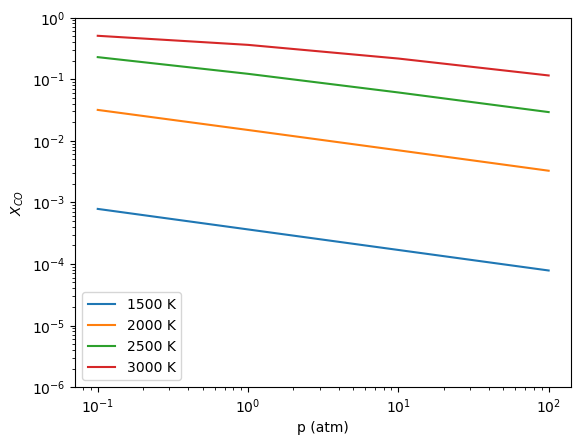

In [11]:
plt.yscale('log')
plt.xscale('log')
plt.plot(p,X_co[:4], label='1500 K', )
plt.plot(p,X_co[4:8],label='2000 K' )
plt.plot(p,X_co[8:12],label='2500 K')
plt.plot(p,X_co[12:16],label='3000 K')

plt.ylim(1e-6,1)
plt.ylabel('$X_{CO}$')
plt.xlabel('p (atm)')
plt.legend();

**Calculation of the adiabatic flame temperature of methane-air mixture for different equivalence ratios** \
The adiabatic flame temperature is determined calculating the equilibrium for adiabatic and isobaric conditions. 

Steps: 
1. set the fuel and oxidizer composition
2. set equivalence ratio `set_equivalence_ratio(...)`
3. set initial conditions (p, T)
4. `equilibrate(...)`

In [12]:
fuel = 'CH4:1'
oxidizer = 'O2:0.21,N2:0.79'

gas2.set_equivalence_ratio(1.0, fuel, oxidizer)

gas2.TP = 298.15, ct.one_atm

gas2.equilibrate('HP')

print('Adiabatic Flame temperature for methane-air mixture at equivalence ratio equal 1 is ', gas2.T, 'K.')

Adiabatic Flame temperature for methane-air mixture at equivalence ratio equal 1 is  2224.224370856366 K.


**Determine and plot the adiabatic flame temperature for methane-air mixture at equivalence ratio between 0.2-3**

In [13]:
phi_points = 50
phi = np.linspace(0.2,3, phi_points)
Tad_ch4=[]

for i in phi:
    gas2.set_equivalence_ratio(i, fuel, oxidizer)
    gas2.TP = 298.15, ct.one_atm
    gas2.equilibrate('HP')
    Tad_ch4.append(gas2.T)

    

In [14]:
Tad_ch4;

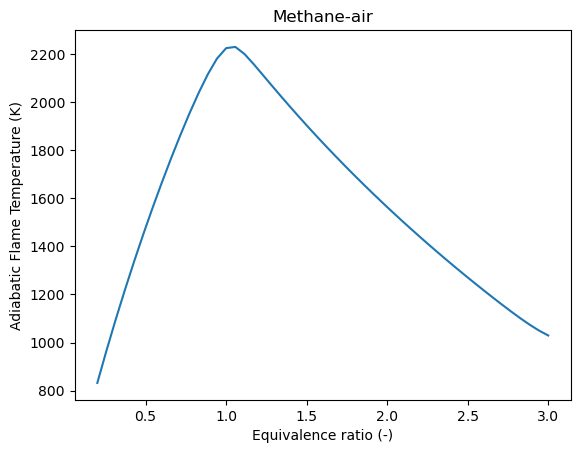

In [15]:
plt.plot(phi,Tad_ch4)
plt.xlabel('Equivalence ratio (-)')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Methane-air');

**Calculate the adiabatic flame temperature for hydrogen-air and hydrogen-oxygen mixture in the equivalence ratio range (0.2-3)** \
**Plot the results for the three mixtures together and save the figure on disk**

In [16]:
Tad_H2_air=[]
Tad_H2_O2=[]

#H2-air
for i in phi:
    gas2.set_equivalence_ratio(i, fuel='H2:1', oxidizer='O2:0.21, N2:0.79')
    gas2.TP = 298.15, ct.one_atm
    gas2.equilibrate('HP')
    Tad_H2_air.append(gas2.T)
#H2-O2    
for i in phi:
    gas2.set_equivalence_ratio(i, fuel='H2:1', oxidizer='O2:1')
    gas2.TP = 298.15, ct.one_atm
    gas2.equilibrate('HP')
    Tad_H2_O2.append(gas2.T)    

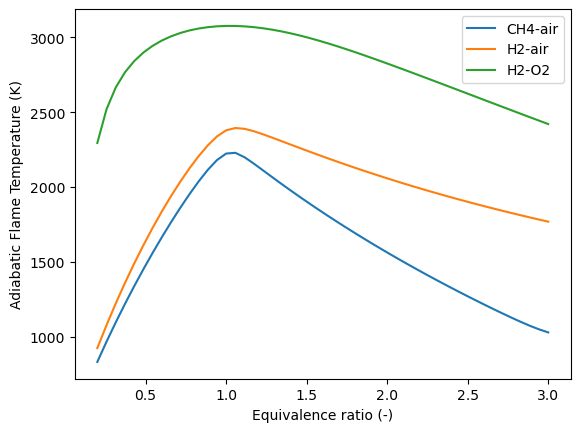

In [17]:
plt.plot(phi,Tad_ch4, label='CH4-air')
plt.plot(phi,Tad_H2_air, label='H2-air')
plt.plot(phi,Tad_H2_O2, label='H2-O2')
plt.xlabel('Equivalence ratio (-)')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.legend();
plt.savefig('AdiabaticFlame.jpg', format='jpg');